In [25]:

from neural_astar.utils.data_maps import create_dataloader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
import cv2
import numpy as np

# Carica l'immagine
image_path = '/home/mastrelli/neural-astar/src/neural_astar/utils/voronoi_utilities/maps_data/maps/train_resized/area4_floor_0.png'
image = cv2.imread(image_path)

# Converti l'immagine in scala di grigi
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Creare una maschera binaria delle aree bianche
_, binary_mask = cv2.threshold(gray_image, 240, 255, cv2.THRESH_BINARY)

# Invertire la maschera
binary_mask_inv = cv2.bitwise_not(binary_mask)

# Trova i contorni dell'edificio
contours, _ = cv2.findContours(binary_mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creare una maschera di riempimento
fill_mask = np.zeros_like(gray_image)

# Riempire solo le aree esterne all'edificio
cv2.drawContours(fill_mask, contours, -1, (255), thickness=cv2.FILLED)

# Invertire la maschera di riempimento
fill_mask_inv = cv2.bitwise_not(fill_mask)

# Applicare la maschera per cambiare le aree esterne bianche in nero
image[fill_mask_inv == 255] = [0, 0, 0]

# Visualizza l'immagine finale





In [30]:
import torch

s = torch.zeros(10, 10, dtype=int)
s[4, 9] = 1.
g = torch.zeros(10, 10, dtype=int)
g[9, 3] = 1.


parents = (
    #Vettori dei starting point
    torch.ones_like(s).reshape(1, -1)
    * g.reshape(1, -1).max(-1, keepdim=True)[-1] #vettori dei goal, poi gli indici di essi
)
parents

sel = torch.zeros(1, 100)
sel[0, 48] = 1.
new_parents = sel.max(-1, keepdim=True)[1]
new_parents



tensor([[48]])

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
torch.Size([1, 300, 300])


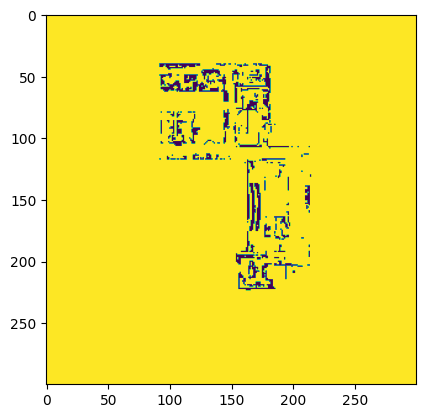

In [2]:

import numpy as np
img = Image.open('C:/Users/User/Desktop/uni/Tesi/neural-astar/src/neural_astar/utils/voronoi_utilities/maps_data/maps/train_resized/area2_floor_0.png')
gray_image = img.convert("L")

transform = transforms.Compose([
    transforms.ToTensor()  # Converts to tensor and scales values to [0, 1]
])

# Apply the transformation to convert the image to a tensor
image_tensor = transform(gray_image)

# Apply a threshold to convert to binary (0 or 1)
threshold = 0.5
binary_tensor = (image_tensor > threshold).float()
plt.imshow(binary_tensor[0])
print(binary_tensor)
print(binary_tensor.shape)

tensor([0., 1.])


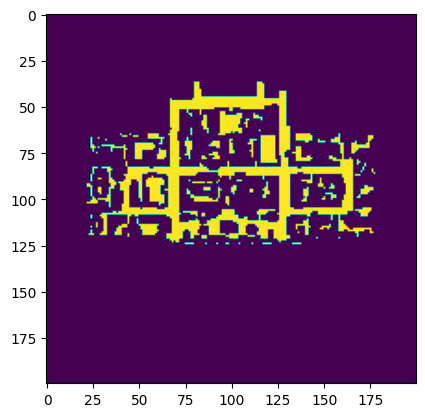

In [26]:
import torch

transform = transforms.Compose([
            transforms.ToTensor()
        ])

image_tensor = transform(image)

map_design = image_tensor
#map_design = torch.clamp(image_tensor.mean(0), 0, 1)
map_design[map_design<1] = 0
map_design[map_design>=1] = 1

plt.imshow(map_design[0])
#plt.xlim(100, 180)
#plt.ylim(450, 50)
print(map_design.unique())
